In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df=pd.read_csv("Heart_Disease_Prediction.csv")
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [4]:
print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [5]:
# Separate the features (X) and target (y)
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9074074074074074


In [11]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [13]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[31  2]
 [ 3 18]]


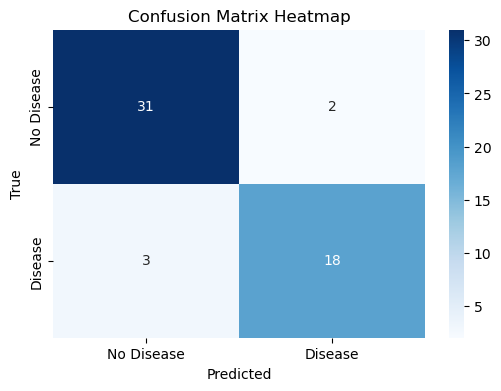

In [14]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


# EXPLANATION:

To interpret this confusion matrix, let's understand what each value represents:

    True Positive (TP): The number of samples correctly predicted as positive (heart disease patients) - 18

    True Negative (TN): The number of samples correctly predicted as negative (non-heart disease patients) - 31

    False Positive (FP): The number of samples incorrectly predicted as positive (non-heart disease patients incorrectly classified as heart disease patients) - 2

    False Negative (FN): The number of samples incorrectly predicted as negative (heart disease patients incorrectly classified as non-heart disease patients) - 3
 
BREAKING DOWN THE RESULTS TO UNDERTAND IT MORE DEEPPLY AND CORRECTLY:

    True Positives (TP): There are 18 patients who were correctly predicted as having heart disease.

    True Negatives (TN): There are 31 patients who were correctly predicted as not having heart disease.

    False Positives (FP): There are 2 patients who were incorrectly predicted as having heart disease, but they actually don't have heart disease.

    False Negatives (FN): There are 3 patients who were incorrectly predicted as not having heart disease, but they actually do have heart disease.

ACCURACY, PRECISION, RECALL, F1 SCORE AND SPECIFICITY (IN DETAIL):

    Accuracy: (TP + TN) / Total = (18 + 31) / (18 + 31 + 2 + 3) ≈ 0.91 or 91%. Accuracy represents the overall correctness of the model's predictions.

    Precision: TP / (TP + FP) = 18 / (18 + 2) ≈ 0.90 or 90%. Precision tells us the proportion of positive predictions that were correct.

    Recall (Sensitivity): TP / (TP + FN) = 18 / (18 + 3) ≈ 0.86 or 86%. Recall indicates the proportion of actual positives that were correctly identified.

    Specificity: TN / (TN + FP) = 31 / (31 + 2) ≈ 0.94 or 94%. Specificity tells us the proportion of actual negatives that were correctly identified.

    F1 Score: 2 (Precision Recall) / (Precision + Recall) ≈ 0.88 or 88%. F1 score is the harmonic mean of precision and recall, giving us a single metric to consider both.

CONCLUSION

Overall, the model appears to perform well, with a 91% accuracy. However, the number of false negatives (FN) is larger than the number of false positives (FP), indicating that the model is somewhat more likely to overlook certain heart disease patients. Depending on the context and the implications of false negatives, more model optimisation may be required to enhance recall or sensitivity while retaining a suitable degree of specificity. Validating the model's performance on a bigger and more varied dataset is also critical.


